## Observations and Insights 

In [1508]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/azpunit/Desktop/matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "/Users/azpunit/Desktop/matplotlib-challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1509]:
# Checking the number of mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique())
number_of_mice

249

In [1510]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

mouse_duplicates = mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_mouse_study_df = mouse_study_df.loc[mouse_duplicates == True, columns]
duplicated_mouse_study_df[["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [1511]:
# Optional: Get all the data for the duplicate mouse ID. 
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

mouse_duplicates = mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_mouse_study_df = mouse_study_df.loc[mouse_duplicates == True, columns]
duplicated_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1512]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1513]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_df = len(clean_mouse_study["Mouse ID"].unique())
number_of_mice_df

249

## Summary Statistics

In [1514]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_clean_mouse_study = clean_mouse_study.groupby("Drug Regimen")
index = clean_mouse_study["Drug Regimen"].unique()
mean = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].mean()
median = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].median()
variance = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].var()
standard_deviation = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].std()
SEM = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].sem()

raw_summary_statistics = pd.DataFrame({"Mean": mean,
                                       "Median": median,
                                       "Variance": variance,
                                       "Standard Deviation": standard_deviation,
                                       "Standard Error of the Mean": SEM },
                                       index=index)

summary_statistics = raw_summary_statistics.sort_index()

summary_statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [1515]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_regimen_clean_mouse_study = clean_mouse_study.groupby("Drug Regimen")
mean = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].mean()
median = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].median()
variance = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].var()
standard_deviation = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].std()
SEM = drug_regimen_clean_mouse_study["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean": mean,
                                   "Median": median,
                                   "Variance": variance,
                                   "Standard Deviation": standard_deviation,
                                   "Standard Error of the Mean": SEM
                                  })

summary_statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

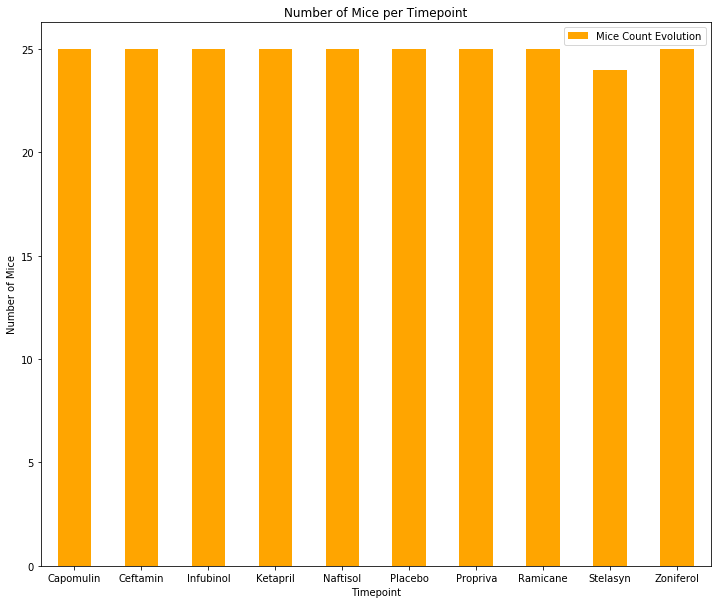

In [1517]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_mouse_study_df = clean_mouse_study.drop_duplicates(subset="Mouse ID")
clean_mouse_study_treatment = clean_mouse_study_df.groupby("Drug Regimen")

number_of_mice_df = clean_mouse_study_treatment["Mouse ID"].count()
new_mouse_study = number_of_mice_df.reset_index()
new_mouse_study_df = new_mouse_study.groupby("Drug Regimen")

data_plot = number_of_mice_df.plot(kind="bar", figsize=(12,10), color="orange", width=0.5, label="Mice Count Evolution")
data_plot.set_xticklabels(new_mouse_study["Drug Regimen"], rotation="horizontal")

data_plot.set_xlim(-0.5, len(new_mouse_study["Drug Regimen"])-0.5)
data_plot.set_ylim(0, max(number_of_mice_df)+1.3)

data_plot.set_title("Number of Mice per Timepoint")
data_plot.set_xlabel("Timepoint")
data_plot.set_ylabel("Number of Mice")
data_plot.legend(loc="best")

data_plot.plot();

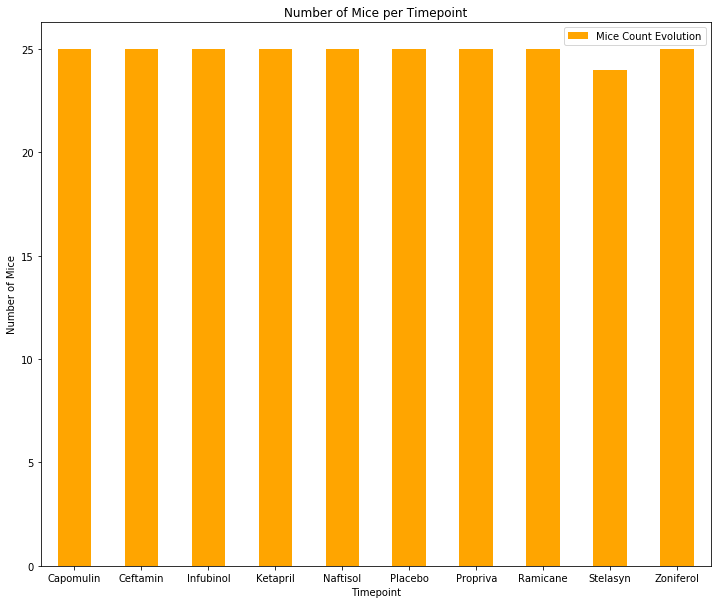

In [1575]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
clean_mouse_study_df = clean_mouse_study.drop_duplicates(subset="Mouse ID")
clean_mouse_study_treatment_df = clean_mouse_study_df.groupby("Drug Regimen")

clean_drug_study = clean_mouse_study.sort_values("Drug Regimen")
clean_mouse_study_treatment_2_df = clean_drug_study["Drug Regimen"].unique()
clean_mouse_study_treatment_4_df = clean_mouse_study_treatment_df["Mouse ID"].count()

x_axis = np.arange(len(clean_mouse_study_treatment_2_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,10))
plt.bar(x_axis, clean_mouse_study_treatment_4_df, align="center", color="orange", width=0.5, label="Mice Count Evolution")
plt.xticks(tick_locations, clean_mouse_study_treatment_2_df, rotation="horizontal")

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(clean_mouse_study_treatment_4_df)+1.3)

plt.title("Number of Mice per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")
plt.legend(loc="upper ")

plt.show()

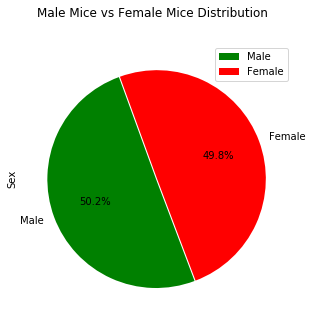

In [1566]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

clean_mouse_gender_study_df = clean_mouse_study.drop_duplicates(subset=["Mouse ID", "Sex"])
colors = ["green", "red"]
explode = (0.01, 0)
labels = clean_mouse_study["Sex"].unique()
male_mice_group = clean_mouse_gender_study_df.loc[clean_mouse_study["Sex"] == "Male", columns]
male_mice_count = len(male_mice_group)
female_mice_group = clean_mouse_gender_study_df.loc[clean_mouse_study["Sex"] == "Female", columns]
female_mice_count = len(female_mice_group)
final_labels = []
for value in labels:
    intermediary_labels = f"{str(value)}"
    final_labels.append(intermediary_labels)
mice_count = [male_mice_count, female_mice_count]

data_pie = pd.DataFrame({"Label": final_labels,
                         "Sex": mice_count
                        })

data_pie_df = data_pie.set_index("Label")

mice_count_plot = data_pie_df.plot(kind="pie", subplots=True, title="Male Mice vs Female Mice Distribution", 
                                   autopct="%1.1f%%", startangle=110, colors=colors, figsize=(5,5),
                                   explode=explode, legend=True)


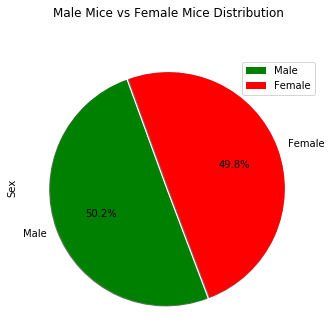

In [1567]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

clean_mouse_gender_study_2_df = clean_mouse_study.drop_duplicates(subset=["Mouse ID", "Sex"])
labels = clean_mouse_study["Sex"].unique()
final_labels_df = []
for value in labels:
    intermediary_labels = f"{str(value)}"
    final_labels_df.append(intermediary_labels)
male_mice_group = clean_mouse_gender_study_2_df.loc[clean_mouse_study["Sex"] == "Male", columns]
male_mice_count = len(male_mice_group)
female_mice_group = clean_mouse_gender_study_2_df.loc[clean_mouse_study["Sex"] == "Female", columns]
female_mice_count = len(female_mice_group)
mice_count_df = [male_mice_count, female_mice_count]
colors = ["green", "red"]
explode = (0.1, 0)

plt.figure(figsize=(5.4,4.8))
plt.pie(mice_count_df, explode=explode, labels=final_labels_df, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110, radius=5)
plt.title("Male Mice vs Female Mice Distribution", pad=40)
plt.legend(loc="best")
plt.ylabel("Sex", labelpad=1)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [1568]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_mouse_study_df = clean_mouse_study.groupby("Mouse ID")
clean_last_timepoint = clean_mouse_study_df[["Timepoint"]].max()

raw_last = pd.merge(clean_last_timepoint, clean_mouse_study, how='left', on=['Mouse ID', 'Timepoint'])

intermediary_last = raw_last.loc[(raw_last["Drug Regimen"] == "Capomulin") | (
                                  raw_last["Drug Regimen"] == "Ceftamin") | (
                                  raw_last["Drug Regimen"] == "Infubinol") | (
                                  raw_last["Drug Regimen"] == "Ramicane"), columns]

final_last = intermediary_last.sort_values("Drug Regimen")

final_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
116,l897,Capomulin,Male,17,19,45,38.846876,1
86,j119,Capomulin,Female,7,23,45,38.125164,1
88,j246,Capomulin,Female,21,21,35,38.753265,1
193,u364,Capomulin,Male,18,17,45,31.023923,3
66,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
92,j913,Ramicane,Female,4,17,45,31.560470,1
94,j989,Ramicane,Male,8,19,45,36.134852,1
97,k403,Ramicane,Male,21,16,45,22.050126,1
120,m546,Ramicane,Male,18,16,45,30.564625,1


In [1569]:
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

# Put treatments into a list for for loop (and later for plot labels)
Capomulin = []
Ceftamin = []
Infubinol = []
Ramicane = []

# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in final_last:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_last_df = final_last.sort_values("Tumor Volume (mm3)")
    capomulin_drug_regimen = final_last_df.loc[final_last_df["Drug Regimen"] == "Capomulin", columns]
    ceftamin_drug_regimen = final_last_df.loc[final_last_df["Drug Regimen"] == "Ceftamin", columns]
    infubinol_drug_regimen = final_last_df.loc[final_last_df["Drug Regimen"] == "Infubinol", columns]
    ramicane_drug_regimen = final_last_df.loc[final_last_df["Drug Regimen"] == "Ramicane", columns]
    # add subset 
    capomulin = [x for x in capomulin_drug_regimen["Tumor Volume (mm3)"]]
    ceftamin = [x1 for x1 in ceftamin_drug_regimen["Tumor Volume (mm3)"]]
    infubinol = [x for x in capomulin_drug_regimen["Tumor Volume (mm3)"]]
    ramicane = [x1 for x1 in ceftamin_drug_regimen["Tumor Volume (mm3)"]]
    # Determine outliers using upper and lower bounds



In [1570]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [1571]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [1572]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [1573]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
